# <div align="center">Practical # 1</div>

# Aim: Solve the s-wave Schrodinger equation for the ground state and the first excited state of hydrogen atom.

The dimensionless radial Schrodinger equation for **Hydrogen atom** is:

$$
\frac{d^2 \Psi\left(x\right)}{dx^2} + \left[\epsilon_n - \frac{l\left(l+1\right)}{x^2} + \frac{2}{x}\right]\Psi\left(x\right) = 0
$$

where, $x = \frac{r}{a_0}\; \left(a_0 \approx 0.592 A\right)$, $\epsilon_n = -\frac{1}{n^2}\; \left(n = 1,2,3, \cdots\right)$, are the Energy Eigen values,  $n$ is the **principal quantum number**, and $l$ is the **azimuthal quantum number**. For $s$-wave we will take $l=0$.

**We have to obtain the energy eigen values of the ground state and the first excited state and plot the corresponding wave functions.**

## *Numerov's* algorithm

The **update equation** for the above equation according to *Numerov's method* is given by:

$$
\Psi_{i+1} =  \frac{\Psi_i\left(12 -10f_i\right) -  \Psi_{i-1}f_{i-1}}{f_{i+1}}
$$

where,

$$
f_i = \left(1 + \frac{h^2}{12}g_i\right), \quad g_i = \epsilon_n - \frac{l\left(l+1\right)}{x_i^2} +\frac{2}{x_i}
$$

**Note**: Here, $h$ is the **step size** along x-axis and not the **Plank's constant**.

We need to do **backward integration** since **forward integration** is unstable. Therefore we rewrite the update equation as:

$$
\begin{align}
&\Psi_{i-1} =  \frac{\Psi_i\left(12 -10f_i\right) -  \Psi_{i+1}f_{i+1}}{f_{i-1}}\\
%
\implies &\Psi_{i} =  \frac{\Psi_{i+1}\left(12 -10f_{i+1}\right) -  \Psi_{i+2}f_{i+2}}{f_{i}}\quad\left(\text{Putting, $i = i+1$}\right)\\
\end{align}
$$

For **backward integration**, we need to provide the value of $\Psi_{i+1}$ and $\Psi_{i+2}$ to get $\Psi_i$.

## Boundary conditions: 

$$
\Psi(0) = 0,\; \Psi(\infty) = 0
$$

## Normalization condition:

Let the normalization factor be $N$ such that, $N\Psi(r)$ is normalized, i.e.,
$$
\begin{align}
&\int_0^\infty N^2|\psi(r)|^2 dr = 1\\
\implies & N = \sqrt{\frac{1}{\int_0^\infty|\psi(r)|^2 dr}}
\end{align}
$$

# How to find the bound state Energy Eigen values ? (Shooting algorithm)

To find the Energy **Eigen values** we will utilize the boundary conditions:
$$
\begin{equation}
\Psi(0) = 0, \quad \Psi(\infty) = 0
\end{equation}
$$
The second boundary condition can be implemented by choosing, some large, $r = r_c$ (say) such that, $\Psi(r_c) = 0$. If say, $E_1$ corresponds to a correct energy level, then when we **backward integrate** the radial wavefunction **Numerov’s method**, we should get $\Psi(0) = 0$. A deviation of the energy from $E_1$ will result in $\Psi(0) \ne 0$. The basic procedure to search for correct Energy Eigen value is as follows:

Start wite a guess energy, 
1) The guess energy, $E_1$ should be smaller than the smallest potential energy. In our case, should be smaller than $-1$. <br>
2) With the guess energy integrate the equation and get the value of the wavefunction at $r = 0$, which we will denote as $\Psi_1$. Meanwhile, Set another energy, $E_2 = E_1$.<br>
3) Increase the energy $E_2$ by an amount $\delta E$ and get a new energy, $E_2 = E_2 + \delta E$. <br>
4) Integrate the Scrodinger equation to get the corresponding wavefunction, $\Psi_2$ and evaluate $\Psi_2(0)$. <br>
5) Go back to step 2 untill we get $\Psi_1(0)\times \Psi_2(0) <0$. <br>
6) At this step, we should have the correct energy enclosed in the interval, $[E_1, E_2]$. Use root finding method, e.g. **scipy.optimize.brentq** to get the correct energy.

# <div align="center">Code</div>

# Common libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Uncommon Libraries used

## 1. *scipy.integrate.simps()*: 

**Syntax** : scipy.integrate.simps(y, x)<br>
**Return** : Returns the integrated value of y(x) using **Simpsion's** rule method.<br>

Example: 

x = **numpy**.arange(0, 10)<br>
y = **numpy**.sqrt(x)<br>
integration = **scipy.integrate.simps**(y, x)

## 2. *scipy.optimize.brentq*
Uses the classic **Brent’s method** to find a root of the function $f(x)$ on the sign changing interval $x\in[a , b]$. Check [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brentq.html) for the syntax. For details on Brent's method check [this](https://nickcdryan.com/2017/09/13/root-finding-algorithms-in-python-line-search-bisection-secant-newton-raphson-boydens-inverse-quadratic-interpolation-brents/). Recall that we had algorithms such as *Line Search*, *Bisection*, *Secant*, *Newton-Raphson*, *Inverse Quadratic Interpolation*; *Brent’s Method* is just one of such methods for finding the root of a function in the sign changing interval $x\in[a,b]$. By "**root** of a function", $f(x)$ I mean the value of $x$ where $f(x) = 0$.

In [9]:
from scipy.integrate import simps
from scipy.optimize import brentq

# <div align="center">Function definitions</div>

We define three functions:

## 1) eigen_function_at_zero(epsilon, x): 

it takes dimensionless energy epsilon and a vector x and returns the value of the eigen function corresponding to dimensionless energy, epsilon at $x = 0$.

## 2) eigen_function(epsilon, x):

it takes dimensionless energy epsilon and a vector x and returns a vector containing the value of the  corresponding wavefunction at all x.

## 3) eigen_values(E_guess, n):

It takes a guess dimensionless eigen energy, E_guess and returns a vector containing the first $n$ eigen values.

In [10]:
###############################################################
#                  eigen_function_at_zero
###############################################################

def eigen_function_at_zero(epsilon, x):

    g = (epsilon + 2/x)
    f  = 1.0 + (h**2/12)*g
    
    y = np.zeros(x.size)
    y[-1] = 0.0 
    y[-2] = 0.001
    
    # Python programming language supports negative indexing of arrays, 
    # The index -1 gives the last element, and -2 gives the second last element
    # The negative indexing starts from where the array ends.

    for i in range(x.size - 3, -1, -1):       # syntax of range(): range(start, stop, step)
        y[i] = (12 - 10*f[i+1])*y[i+1] - y[i+2] * f[i+2]
        
        y[i] /= f[i]  

    # normalization
    y /= np.sqrt(simps(np.abs(y)**2, x))     # a/=3 means a = a/3 


    y_zero = y[0]

    
    return y_zero


###############################################################
#                  eigen_function
###############################################################

def eigen_function(epsilon, x):

    g  = epsilon + 2/x
    f  = 1.0 + (h**2/12)*g
    
    y = np.zeros(x.size)
    y[-1] = 0.0                               # wavefunction is zero at x = infinity
    y[-2] = 0.001

    for i in range(x.size - 3, -1, -1):       # syntax of range(): range(start, stop, step)
        y[i] = (12 - 10*f[i+1])*y[i+1] - y[i+2] * f[i+2]
        
        y[i] /= f[i]  

    # normalization
    y /= np.sqrt(simps(np.abs(y)**2, x))

    return y


###############################################################
#                  eigen_values
###############################################################

def eigen_values(E_guess, x,  n):

    Epsilon = np.zeros(n)
    
    E_2 = E_1 = E_guess
    
    # step size for energy
    dE      = 0.01

    for i in range(n):
        # wavefunction at x = infinity corresponding to the guess energy
        y1      = eigen_function_at_zero(E_1, x)
        
        while True:
            E_2 += dE
            y2 = eigen_function_at_zero(E_2, x)
            
            if y1 * y2 < 0:
                break
                
        Epsilon[i] = brentq(eigen_function_at_zero, E_1, E_2, args=(x))
        
        E_1 = E_2 = Epsilon[i]+ dE
    
    return Epsilon

# <div align="center">Main code starts from here</div>

# Print the values of first two eigen values

In [11]:
x = np.linspace(1E-6, 30, 1000)
h = x[1] - x[0]           # step size

E_guess = -1.2

Epsilon = eigen_values(E_guess, x, 2)

for i in range(2):
    print ('Numerical bound state at E = %6.3f (eV),  Theoretical energy = %5.3f, (n = %d, l = 0)' % (Epsilon[i]*13.6, -1/(i+1)**2*13.6, i+1))
    

Numerical bound state at E = -13.592 (eV),  Theoretical energy = -13.600, (n = 1, l = 0)
Numerical bound state at E = -3.399 (eV),  Theoretical energy = -3.400, (n = 2, l = 0)


# Evaluate the eigen functions for the $n= (1, 2), l = 0$

In [12]:
# store the wavefunction for first six eigen values

n_l = [(1,0), (2, 0)]

y = [eigen_function(Epsilon[i], x) for i in range(Epsilon.size)]

# Plot the solution for different values of $n= (1, 2), l = 0$

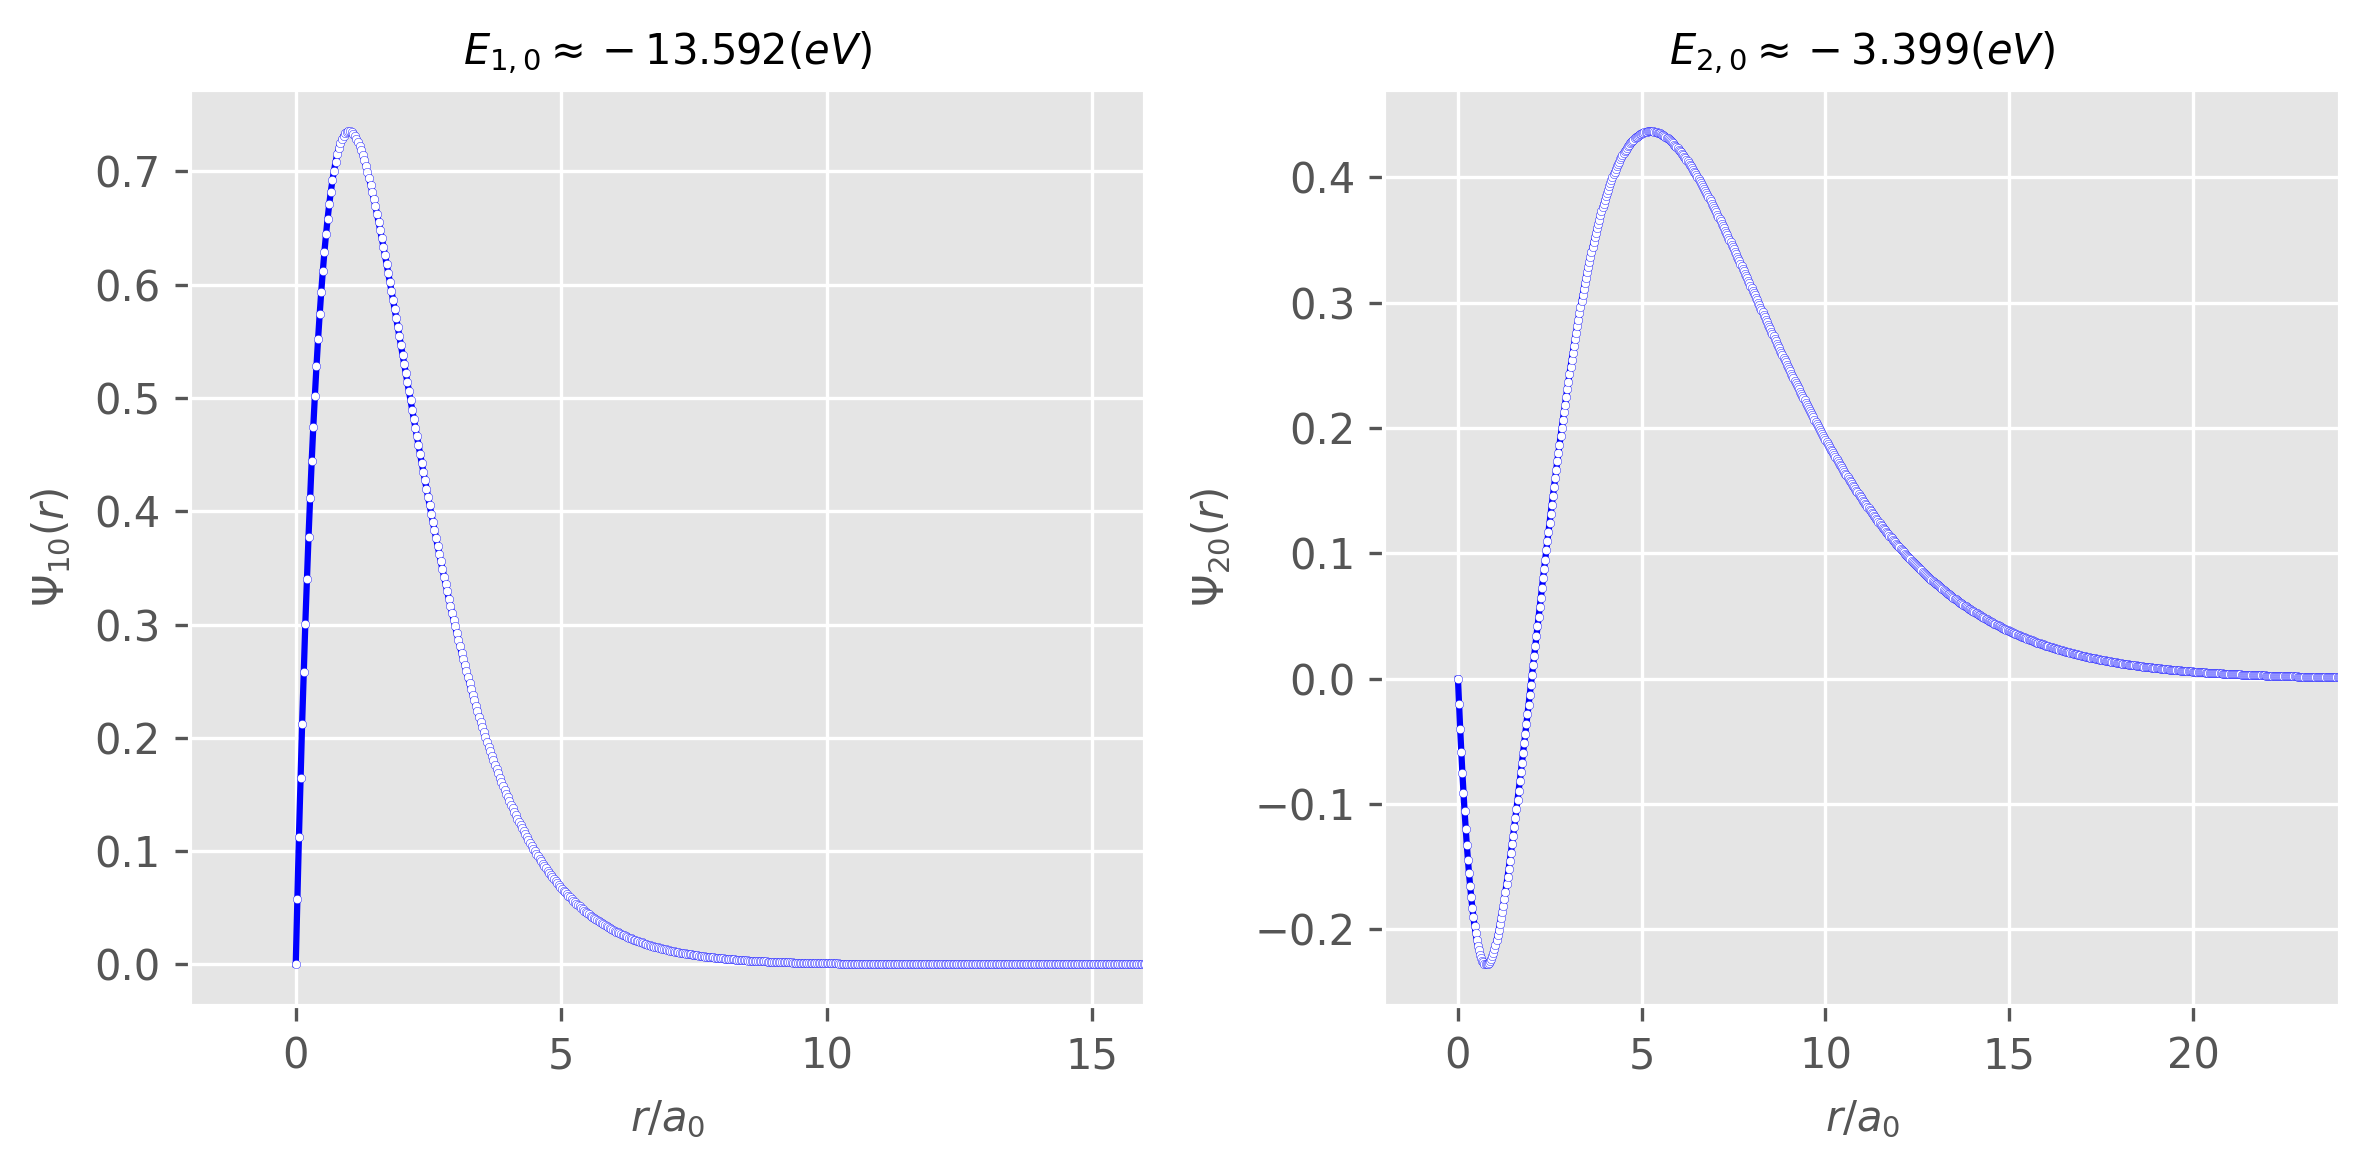

In [13]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(8, 4),dpi=300)

axes = [plt.subplot(1, 2 ,i+1) for i in range(2)]

# plt.subplot(1, 2, 1) means the figure has 1 row, 2 columns, and this plot is the first plot.

for i in range(2):
    ax = axes[i]

    ax.plot(x, y[i], marker='o', ms = 2, mfc='white',mew=0.1, color='blue')
    
    # ms stands for marker size
    # mfc stands for marker fill colour
    # mew stands for marker edge width
    
    # axis labels
    ax.set_xlabel(r'$r/a_0$', labelpad=5, fontsize="10")
    ax.set_ylabel(r'$\Psi_{{ {}{} }}(r)$'.format(*n_l[i]), labelpad=5, fontsize="10")


    # x axis range
    ax.set_xlim(-2, 16 + i*8)
    
    # plot titles
    ax.set_title(r'$E_{%d,0} \approx %5.3f (eV)$' % (i+1,Epsilon[i]*13.6), fontsize="10")

# plot layout
plt.tight_layout()

# save the plot to file named 'plot.png'
plt.savefig('plots.png')

# Display the plot in this notebook
plt.show()